In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib as mpl
import seaborn as sns

from pneumococcus_data import data_observation
from network_function import network, net_draw
from subsystem import alpha_extract

# 1. Common strains of three countries Brazil, Denmark, Mozambique

In [2]:
Iran, Denmark, Brazil, Nepal, Mozambique = data_observation()

countries = [Brazil.strain, Denmark.strain, Mozambique.strain]
common_strain = list(set.intersection(*map(set, countries)))
print(common_strain, len(common_strain))

['19A', '35B', '4', '23F', '3', '15C', '15A', '9N', '19F', '14', '6B', '17F', '16F', '11A', '6A', '10A'] 16


In [3]:
common_strain = ['6B', '9N', '4', '19F', '15C', '17F', '15A', '35B', '3', '6A', '19A', '14', '11A', '16F', '10A', '23F']

In [4]:
#import big_alpha
big_alpha_Jan = np.loadtxt(open("big_alpha_Jan.txt","rb"), delimiter=",", skiprows = 0)
big_alpha_May = np.loadtxt(open("big_alpha_May.txt","rb"), delimiter=",", skiprows = 0)

# Extract alpha values for common strains of countries Brazil, Denmark, Mozambique
c_Jan = alpha_extract(common_strain, big_alpha_Jan)
c_May = alpha_extract(common_strain, big_alpha_May)

common_alpha = [c_Jan, c_May]

In [5]:
def fitness(mu, alpha):
    #size of matrix
    size = len(alpha[0])
    #matrix Lambda
    lambd = np.zeros((size, size))
    for i in range (0, size):
        for j in range (0, size):
            lambd[i,j] = mu*(alpha[j,i] - alpha[i,j]) + alpha[j,i] - alpha[j,j]
    return lambd

In [6]:
mapping = dict(zip(range(1, 17), common_strain))
print(mapping)

{1: '6B', 2: '9N', 3: '4', 4: '19F', 5: '15C', 6: '17F', 7: '15A', 8: '35B', 9: '3', 10: '6A', 11: '19A', 12: '14', 13: '11A', 14: '16F', 15: '10A', 16: '23F'}


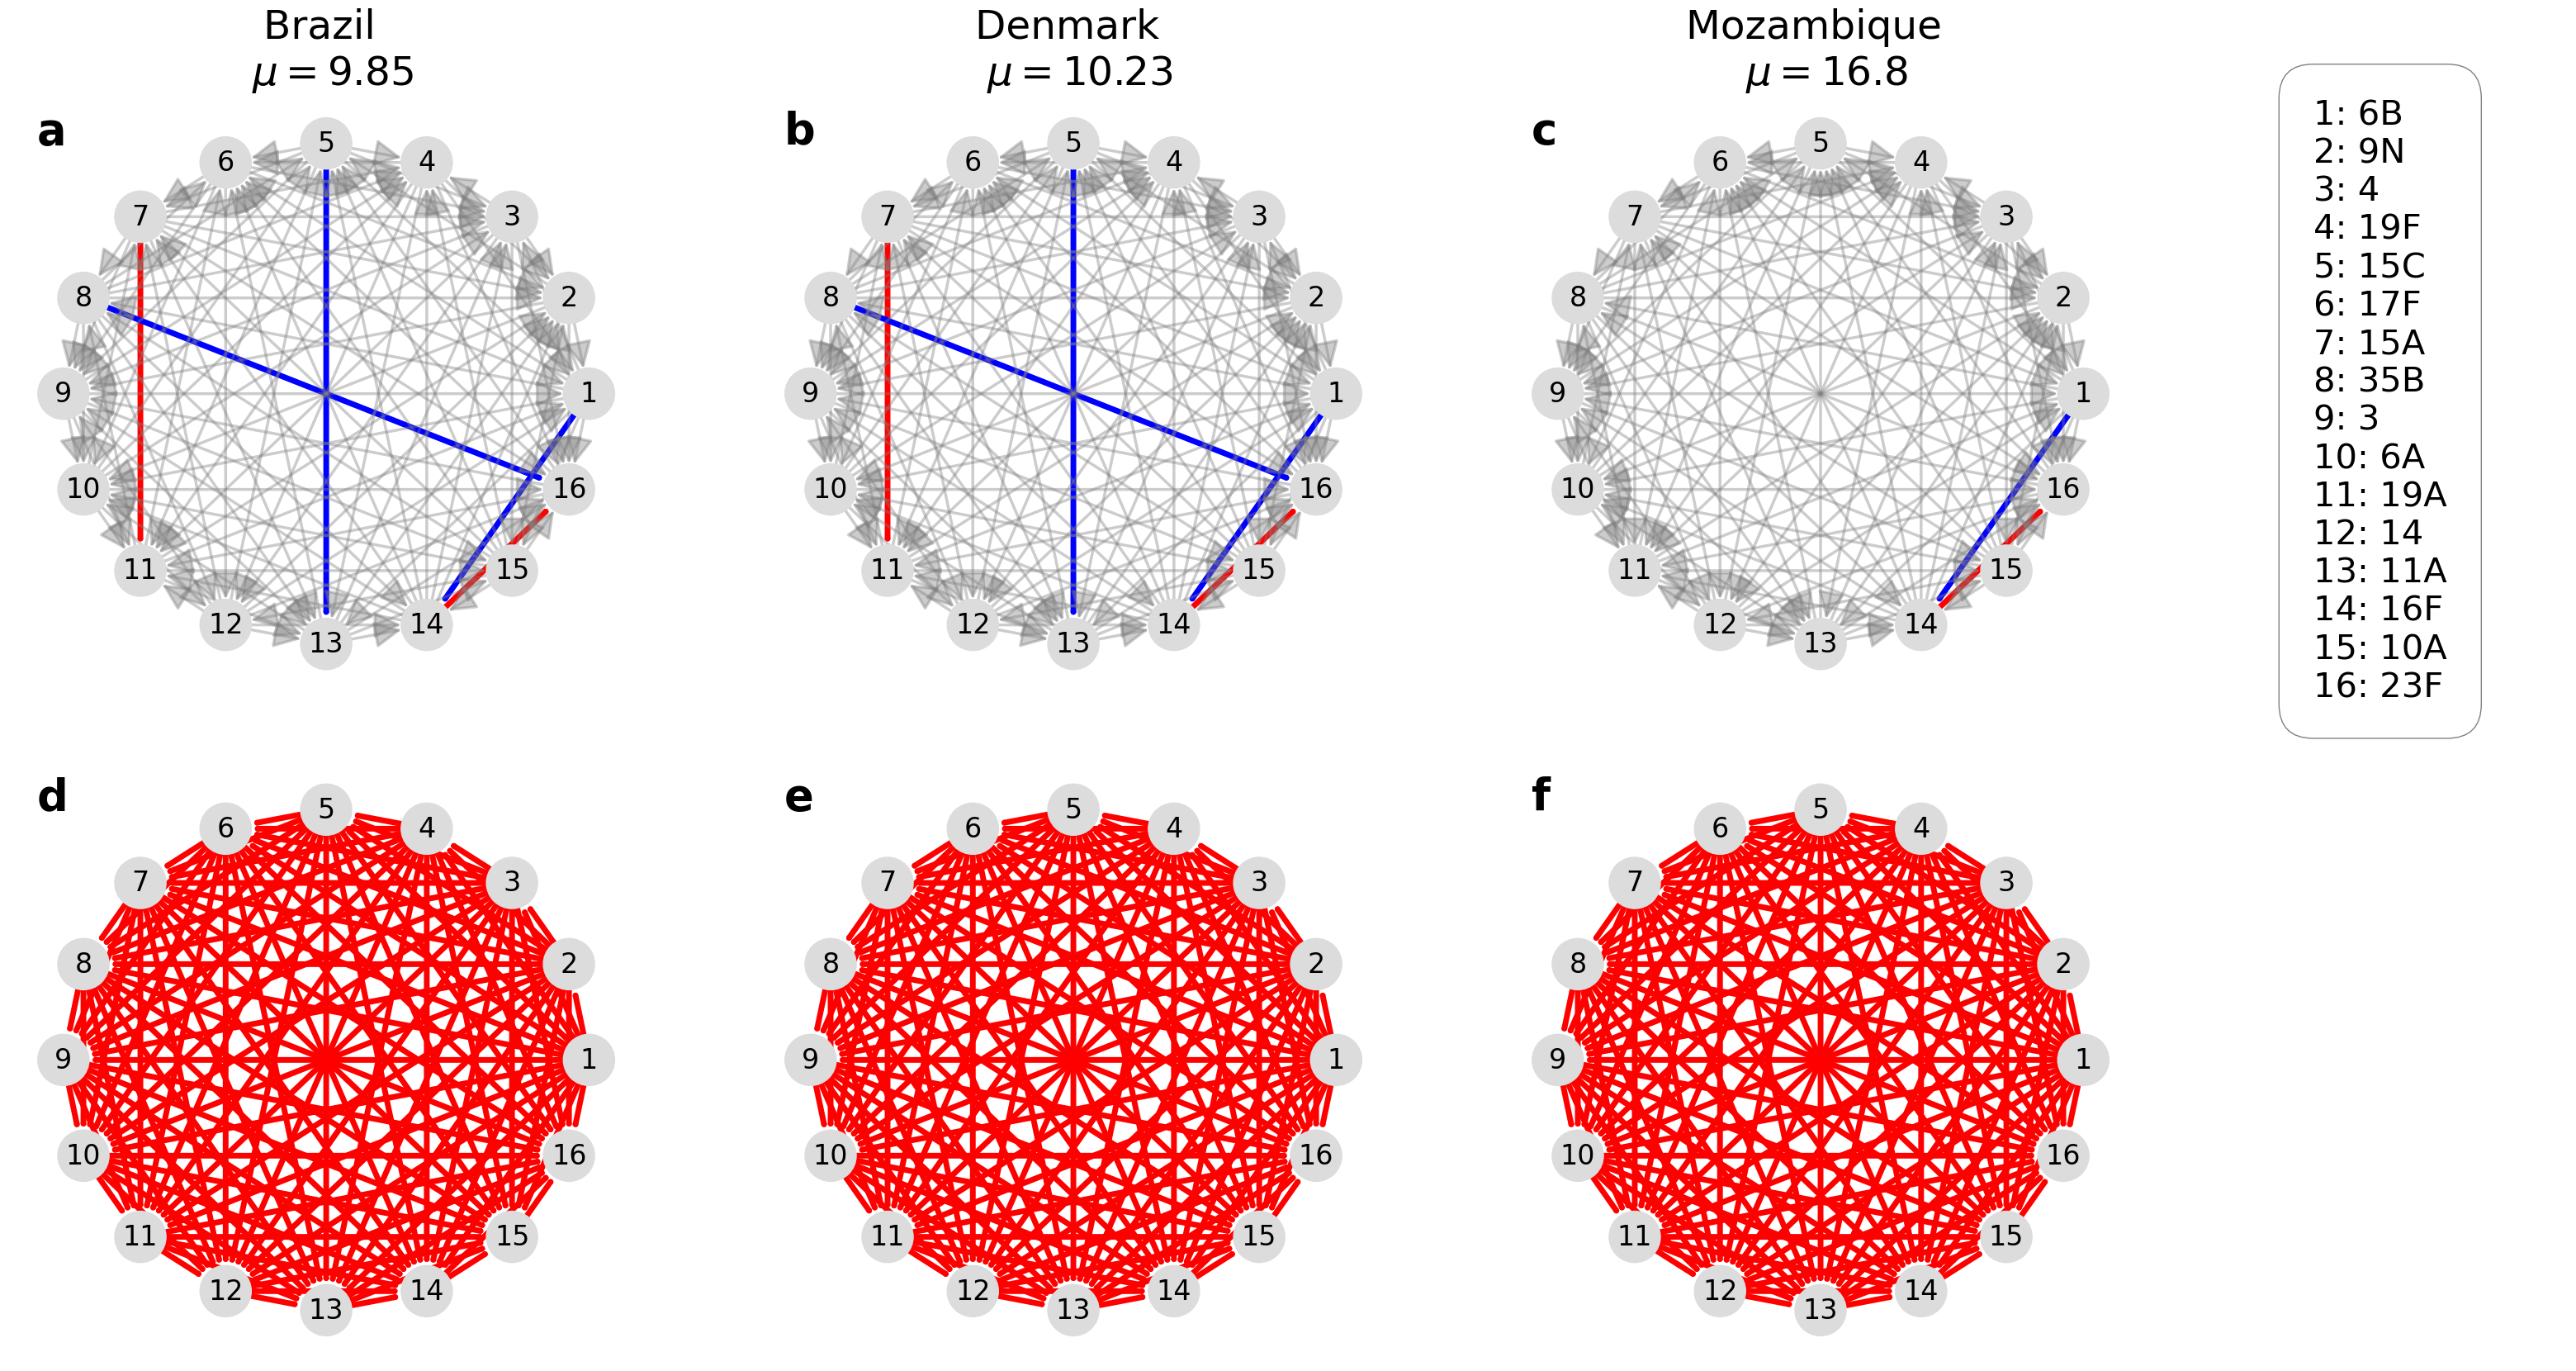

In [11]:
# Network graphs for three countries
n = len(common_strain)
mu_list = [9.85, 10.23, 16.8]

fig, ax = plt.subplots(ncols = 4, nrows = 2, figsize=(40, 20), gridspec_kw={'width_ratios': [1, 1, 1, 0.5]})
plt.subplots_adjust(wspace = 0.2, hspace = 0.1)
    
label = ['Brazil', 'Denmark', 'Mozambique']
abc = np.array([['a', 'b', 'c'], ['d', 'e', 'f']])

for j in range (0, 2):
    ax[j, 3].axis('off')
    
    for i in range (0, 3):
        ax[j, i].axis('off')
        lambda_list = fitness(mu_list[i], common_alpha[j])
        G = network(lambda_list)
        G = net_draw(G, ax = ax[j,i], edges_size = None, nodes = [1]*16)
        
        ax[j, i].text(-1.1, 1, f'{abc[j,i]}', fontsize = 38, weight='bold')


for i in range (0, 3):
    ax[0, i].set_title(f'{label[i]} \n $\\mu = ${mu_list[i]}', fontsize = 35)

ax[0, 3].annotate('1: 6B\n2: 9N\n3: 4\n4: 19F\n5: 15C\n6: 17F\n7: 15A\n8: 35B\n9: 3\n10: 6A\n11: 19A\n12: 14\n13: 11A\n14: 16F\n15: 10A\n16: 23F',  
                  xy=(0.2, 0), fontsize = 30, bbox=dict(facecolor='none', edgecolor='grey', boxstyle='round,pad=1'))

plt.show()
#fig.savefig('3countries_network.png', dpi = 300, bbox_inches='tight')

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
sns.heatmap(common_alpha, ax = ax, 
            vmin = - 0.5, vmax = 0, 
            cmap = "bwr", cbar = True)
plt.show()

# 2. Common strains of all 5 countries

In [ ]:
countries = [Iran.strain, Brazil.strain, Denmark.strain, Mozambique.strain, Nepal.strain,  Nepal.strain]
common_strain = list(set.intersection(*map(set, countries)))
print(common_strain, len(common_strain))
common_strain = ['6B', '4', '19F', '3', '6A', '19A', '14']

In [ ]:
# Extract alpha values for common strains of countries Brazil, Denmark, Mozambique
common_alpha_1 = alpha_extract(common_strain, big_alpha_1)
common_alpha_2 = alpha_extract(common_strain, big_alpha_2)

In [ ]:
#compute fitness matrix for common strains of three countries
Brazil_lambda = fitness(9.85, common_alpha_1)
Iran_lambda = fitness(0.93, common_alpha_1)
Denmark_lambda = fitness(10.23, common_alpha_1)
Mozambique_lambda = fitness(16.8, common_alpha_1)
Nepal_lambda_1 = fitness(3.95, common_alpha_1)
Nepal_lambda_2 = fitness(3.95, common_alpha_2)

In [ ]:
# Network graphs for three countries
n = len(common_strain)

fig, ax = plt.subplots(nrows = 2, ncols = 4, figsize=(22, 13), gridspec_kw={'width_ratios': [1, 1, 1, 0.5]})
plt.subplots_adjust(hspace = 0.4)

label = np.array([['Iran', 'Brazil', 'Denmark'], ['Mozambique', 'Nepal (Case 1)', 'Nepal (Case 2)']])
lambda_list = np.array([[Iran_lambda, Brazil_lambda, Denmark_lambda], [Mozambique_lambda, Nepal_lambda_1, Nepal_lambda_2]])
mu_list = np.array([[0.93, 9.85, 10.23], [16.8, 3.95, 3.95]])

for i in range (0, 2):
    for j in range (0, 3):
        G = network(lambda_list[i,j])
        net_draw(G, ax = ax[i,j], edges_size = None, nodes = [1]*7)
        ax[i,j].set_title(f'{label[i,j]} \n $\\mu = ${mu_list[i,j]}', fontsize = 24)

ax[0,3].annotate('1: 6B\n2: 4\n3: 19F\n4: 3\n5: 6A\n6: 19A\n7: 14',  xy=(0.2, 0.3), fontsize = 24, bbox=dict(facecolor='none', edgecolor='grey', boxstyle='round,pad=1'))
ax[0, 3].axis('off')
ax[1, 3].axis('off')

fig.savefig('5countries_network.png', dpi = 300, bbox_inches='tight')